In [ ]:
from google.colab import drive
drive.mount("/content/movie_ratings")

Mounted at /content/movie_ratings


In [ ]:
import pandas as pd

file_path = "/content/movie_ratings/MyDrive/Share IMDb Movies India.csv"

# Try different encodings if the first one doesn't work
try:
    train_data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        train_data = pd.read_csv(file_path, encoding='latin1')
    except UnicodeDecodeError:
        train_data = pd.read_csv(file_path, encoding='iso-8859-1')

train_data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [ ]:
# Check for missing values and data types
train_data.info()

# Summary statistics
train_data.describe()

# Check for null values
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Handling missing values
train_data.fillna(method='ffill', inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = train_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

train_data.head()

Name  Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
0     0   102       182    299     NaN   2034      1926     2250      800   
1     1    98         9    299     7.0   1849      1548     3280     4790   
2     2   100       172    351     7.0   1849      5123     3713     2866   
3     3    98        10    228     4.4   1169      3319     2917     1504   
4     7    89         5    299     4.4   1169       385     3112     3462   

   Actor 3  
0     3108  
1      527  
2     3450  
3     4020  
4      405

In [ ]:
# Display the column names in the dataset
train_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Display the column names to identify the target column
print(train_data.columns)

# Define features and target
# Replace 'target_column' with the actual target column name, e.g., 'Rating'
X = train_data.drop(columns=['Rating'])  # Assuming 'Rating' is the target column
y = train_data['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])
# Fill missing numerical values with the mean
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# Fill missing categorical values with the mode
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
print(train_data.isnull().sum().sum())
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
# Replace 'Rating' with the actual target column name
X = train_data.drop(columns=['Rating'])  # Assuming 'Rating' is the target column
y = train_data['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

Rating    1
dtype: int64
0
Training RMSE: 0.4736965160272607
Testing RMSE: 1.3086005460459291
R^2 Score: 0.11369004296519858


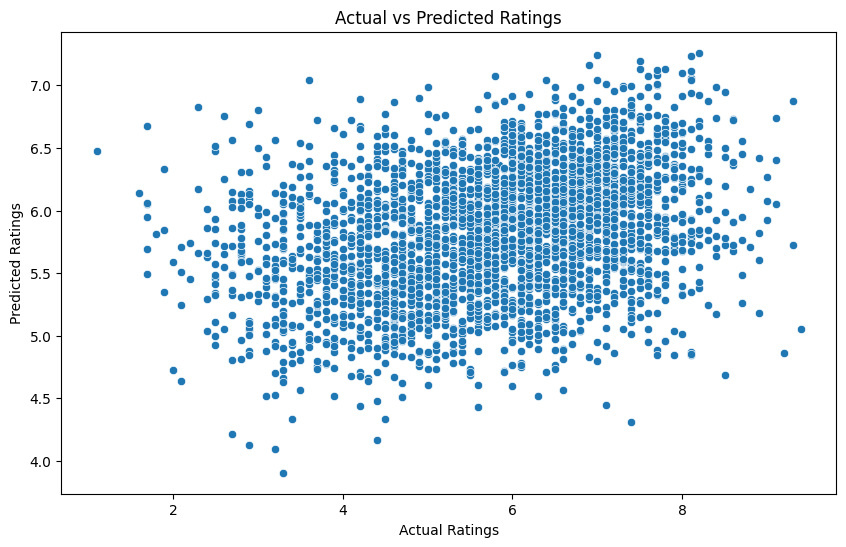

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

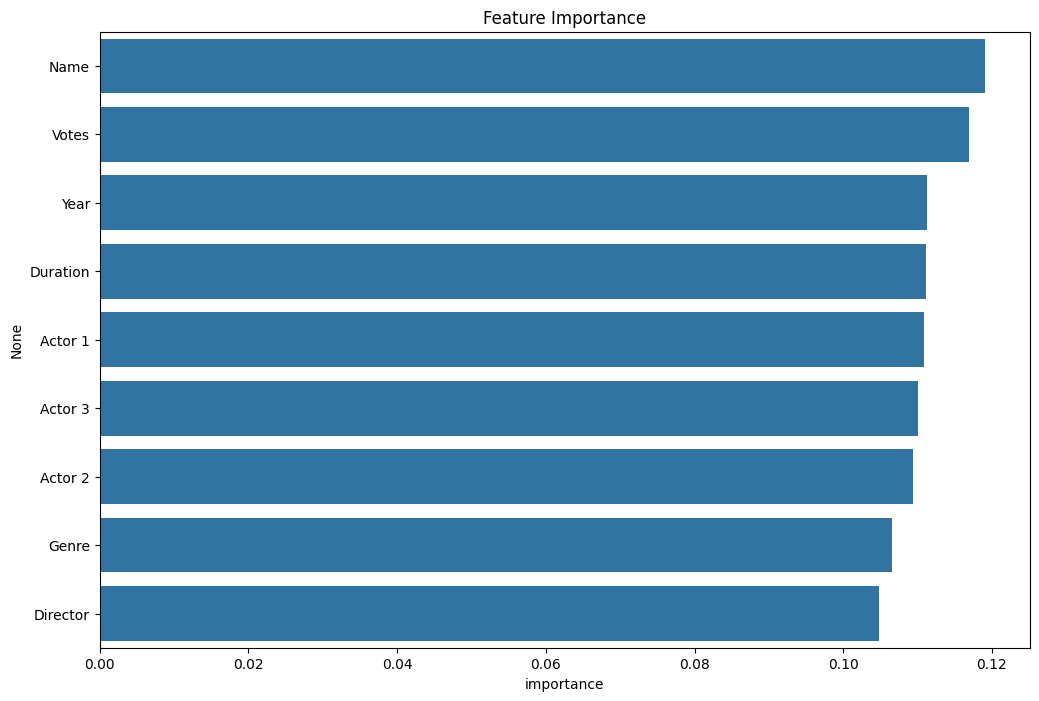

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'movie_ranking_model.pkl')

['movie_ranking_model.pkl']

In [ ]:
# Create a DataFrame with actual and predicted ratings
results = pd.DataFrame({'Actual_Ratings': y_test, 'Predicted_Ratings': y_pred_test})

# Save to CSV
results.to_csv('predicted_ratings.csv', index=False)
(results)

Actual_Ratings  Predicted_Ratings
11115             7.4              5.559
2921              6.8              5.704
3463              7.7              6.598
2495              4.5              6.173
15263             4.6              5.260
...               ...                ...
6434              5.1              5.455
14615             8.2              6.677
12250             6.6              6.361
4139              4.3              5.519
4679              6.2              5.979

[3102 rows x 2 columns]

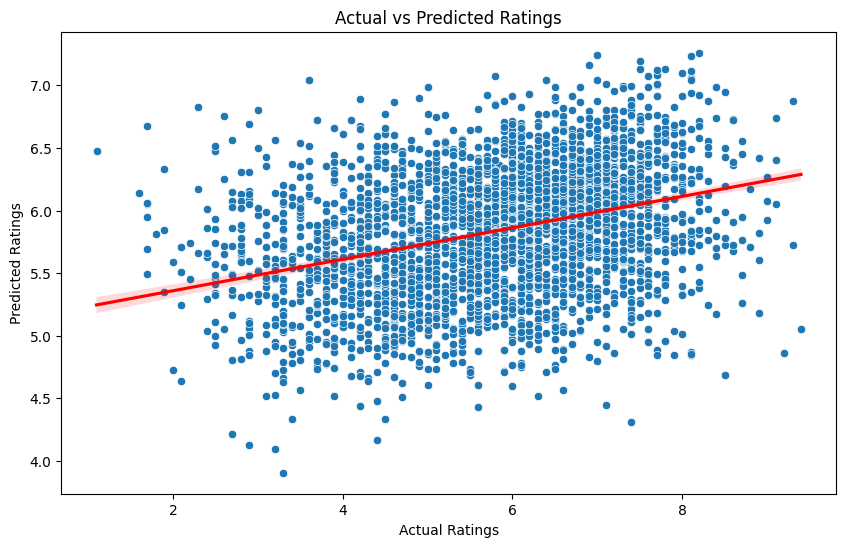

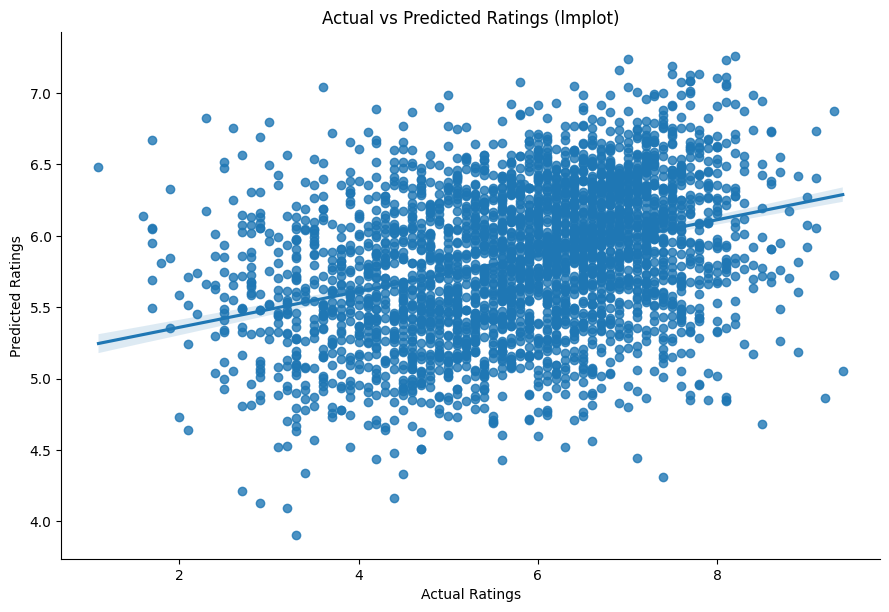

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for actual vs predicted ratings
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
sns.regplot(x='Actual', y='Predicted', data=results, scatter=False, color='red')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# lmplot
sns.lmplot(x='Actual', y='Predicted', data=results, height=6, aspect=1.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (lmplot)')
plt.show()

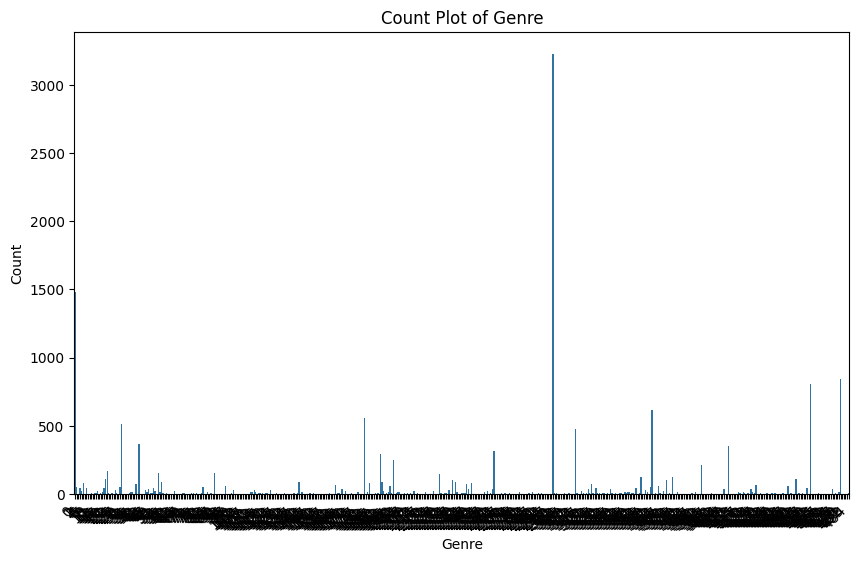

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Genre')
plt.title('Count Plot of Genre')

# Rotate the X-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels to the axes
plt.xlabel('Genre')
plt.ylabel('Count')

plt.show()

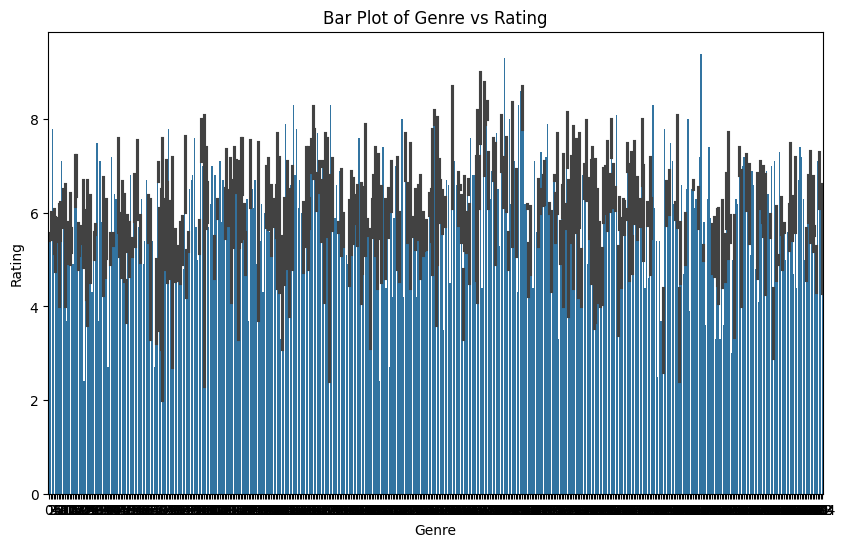

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Rating', data=train_data)
plt.title('Bar Plot of Genre vs Rating')
plt.show()

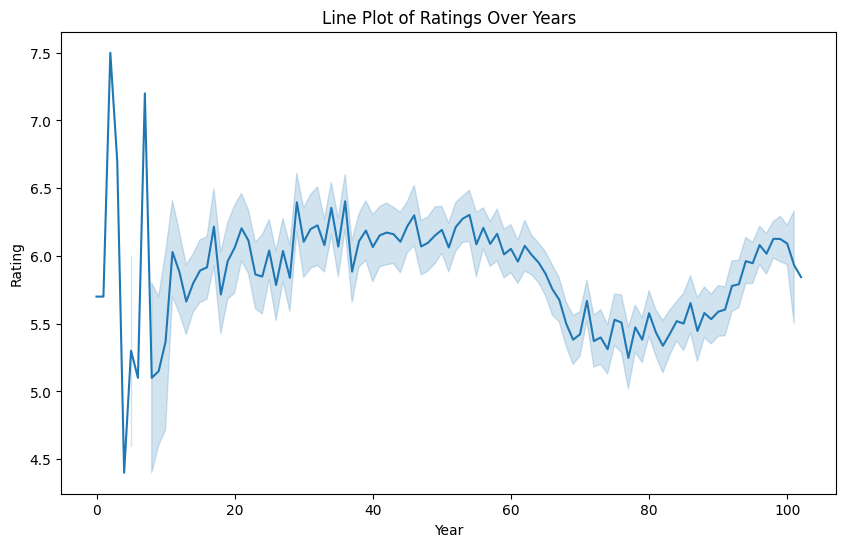

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='Year', y='Rating')
plt.title('Line Plot of Ratings Over Years')
plt.show()

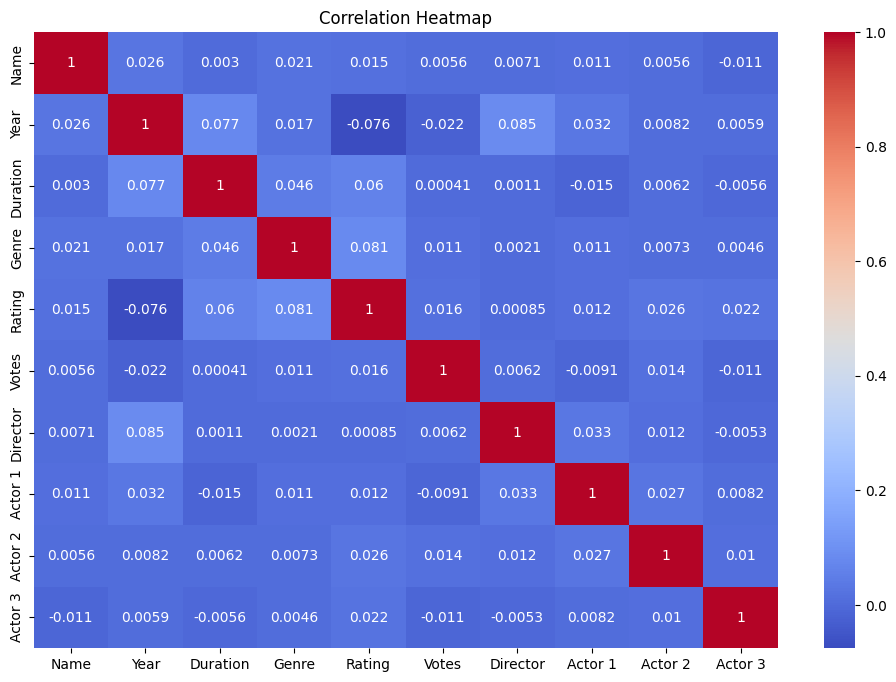

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-18-eba8895038ad>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Rating'], shade=True)


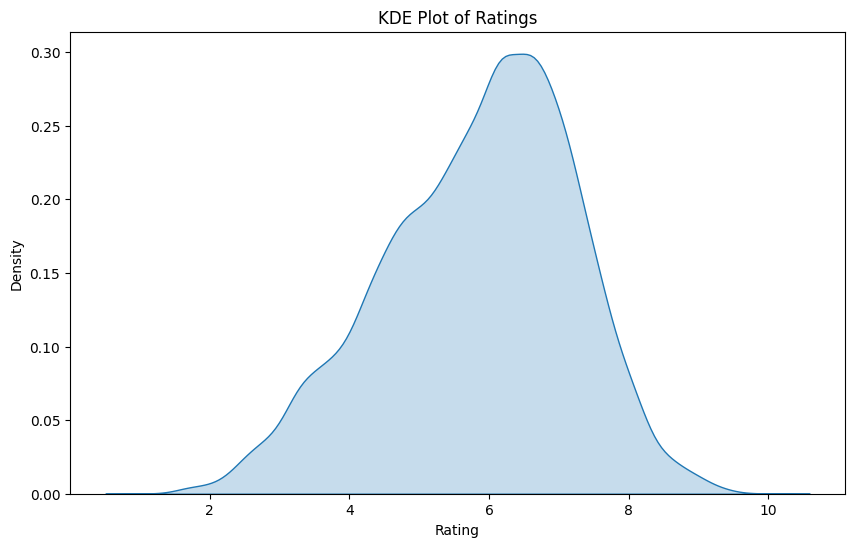

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data['Rating'], shade=True)
plt.title('KDE Plot of Ratings')
plt.show()

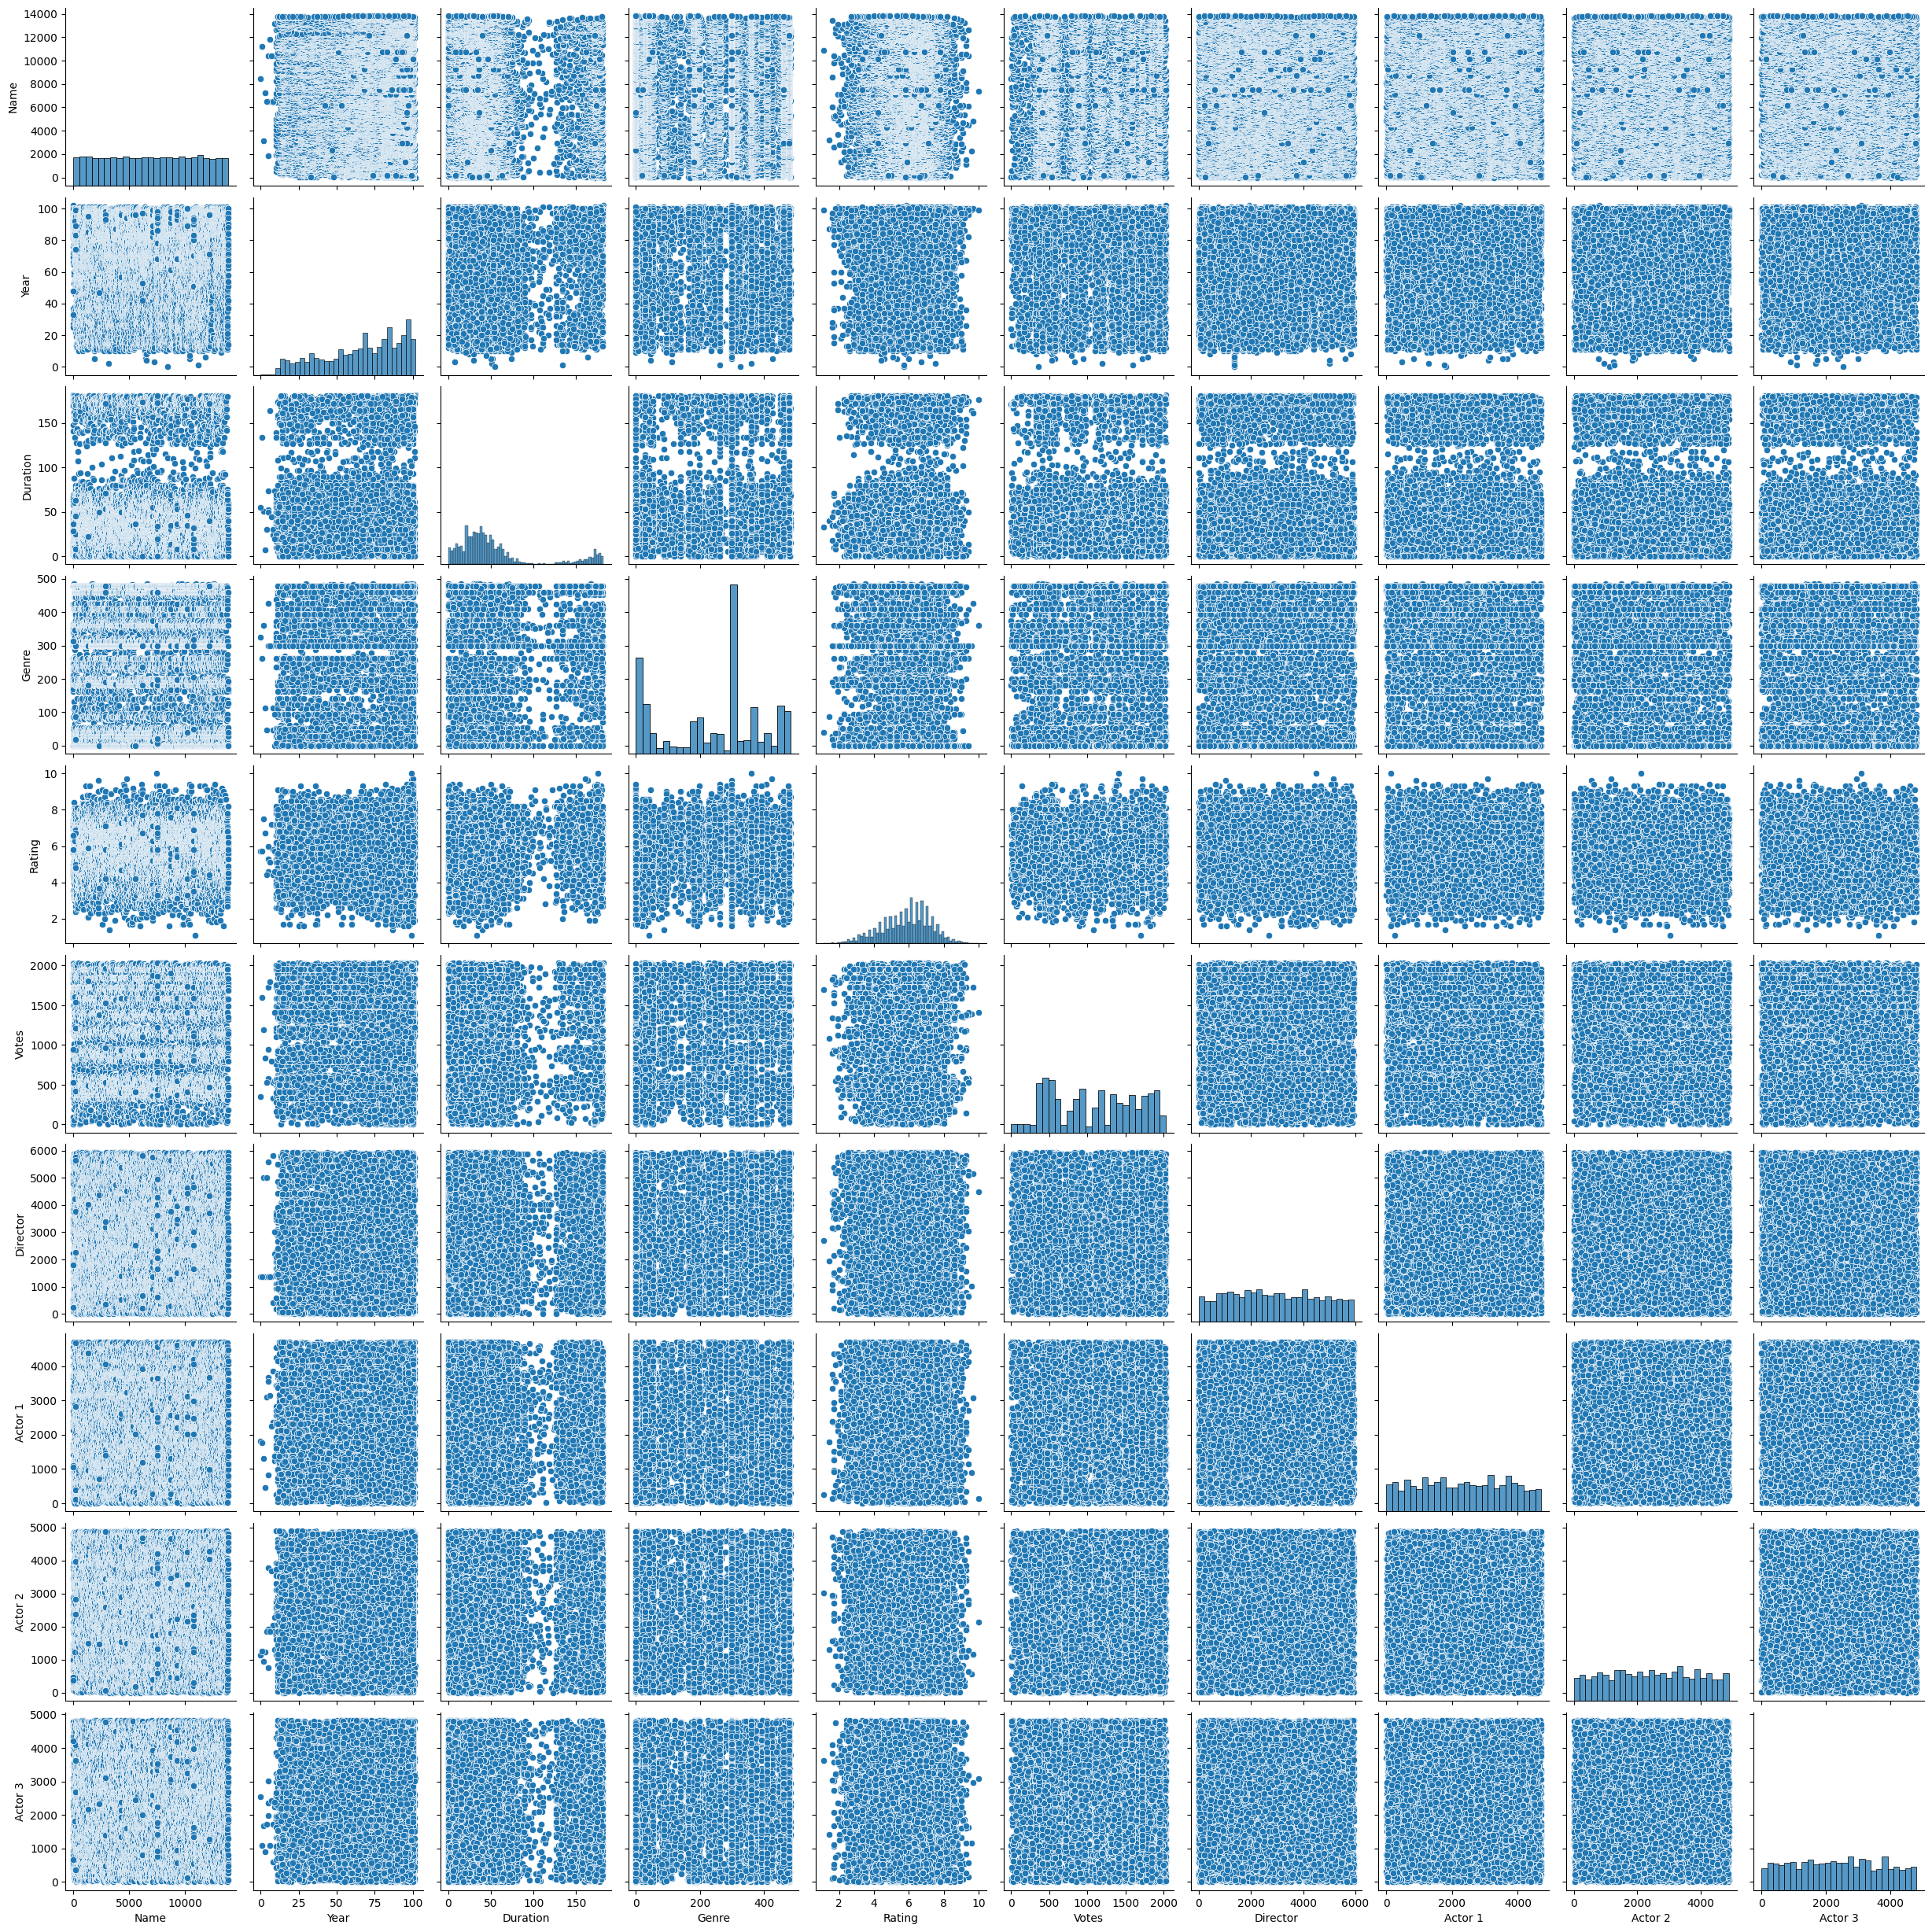

In [ ]:
sns.pairplot(train_data)
plt.show()

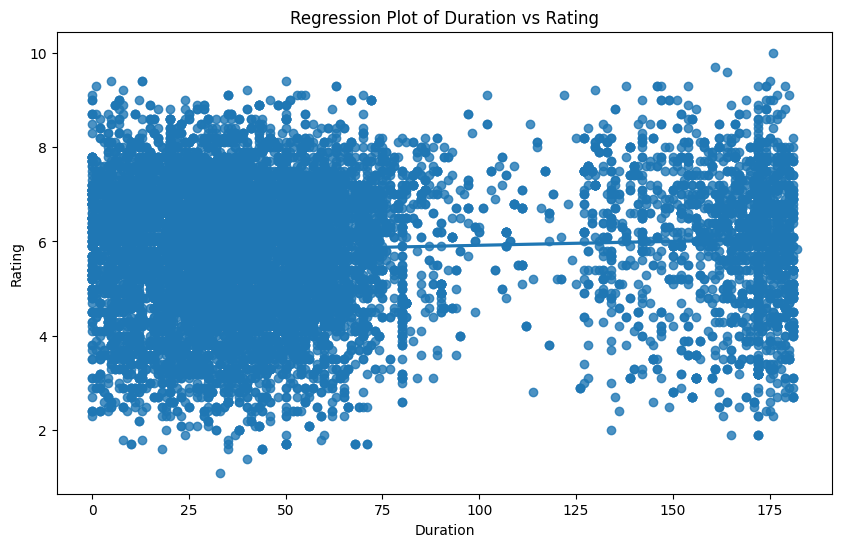

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Duration', y='Rating', data=train_data)
plt.title('Regression Plot of Duration vs Rating')
plt.show()

In [ ]:
# Create a DataFrame with actual and predicted ratings
results = pd.DataFrame({'Actual_Ratings': y_test, 'Predicted_Ratings': y_pred_test})

# Save to CSV
results.to_csv('predicted_ratings.csv', index=False)
(results)

Actual_Ratings  Predicted_Ratings
11115             7.4              5.559
2921              6.8              5.704
3463              7.7              6.598
2495              4.5              6.173
15263             4.6              5.260
...               ...                ...
6434              5.1              5.455
14615             8.2              6.677
12250             6.6              6.361
4139              4.3              5.519
4679              6.2              5.979

[3102 rows x 2 columns]

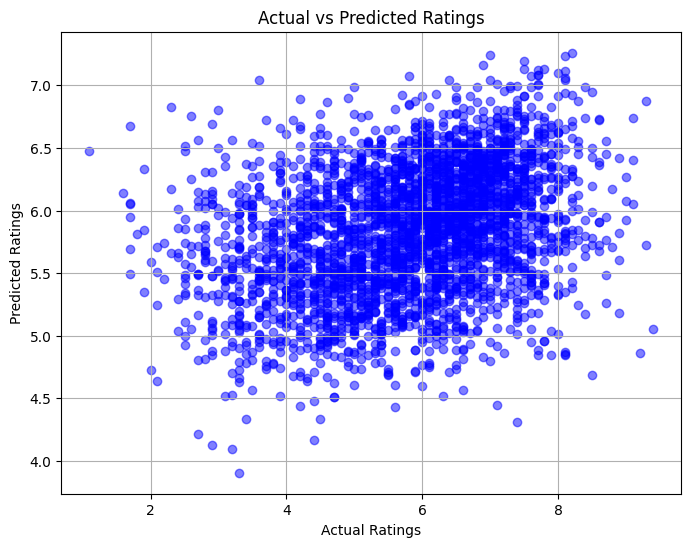

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already created and saved the DataFrame 'results'

# Read the DataFrame from CSV
results = pd.read_csv('predicted_ratings.csv')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual_Ratings'], results['Predicted_Ratings'], color='blue', alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()